# Lab: 13 - Linear Regressions
## Possum Length to its' Head Length Linear Regression - Possum's skull width and its' Head Length Linear Regression - Mohammed Al-Hanbali - 26/10/2021

In [2858]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2859]:
possum_data = pd.read_csv("possum.csv")
possum_data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Possum Data Description

In [2860]:
possum_data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


### Possum Data Information

In [2861]:
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


### Available Possum Data 

In [2862]:
print(possum_data.columns)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


### Checking for correlation in data

In [2863]:
possum_data.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


### Graphical relation between a Possum's total length and its' head length

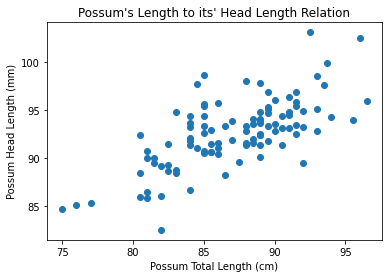

In [2864]:
plt.scatter(possum_data["totlngth"], possum_data["hdlngth"])
plt.xlabel("Possum Total Length (cm)")
plt.ylabel("Possum Head Length (mm)")
plt.title("Possum's Length to its' Head Length Relation")
plt.show()

### Separating Possum Study Case Data

In [2865]:
possum_case = possum_data[["totlngth", "hdlngth"]]
possum_case

,totlngth,hdlngth
0,89.0,94.1
1,91.5,92.5
2,95.5,94.0
3,92.0,93.2
4,85.5,91.5
...,...,...
99,81.5,89.5
100,82.5,88.6
101,89.0,92.4
102,82.5,91.5


### Setting Selection Features

In [2866]:
X = possum_case["totlngth"].values
y = possum_case["hdlngth"].values

### Reshaping Data

In [2867]:
X = X.reshape(-1, 1)

### Splitting Data into train and test Data

In [2868]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=70, test_size=30, random_state=80)

### Fiting training data to the regression model

In [2869]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)


### Regression model score

In [2870]:
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")


Train accuracy 44.95 %


In [2871]:
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Test accuracy 54.13 %


### Rrelation between a Possum's total length and its' head length Regression Model

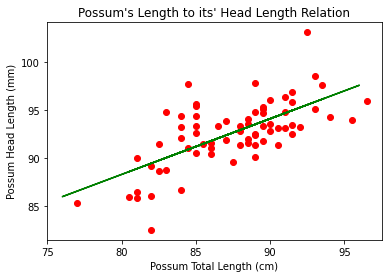

In [2872]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict, color='green')
plt.xlabel("Possum Total Length (cm)")
plt.ylabel("Possum Head Length (mm)")
plt.title("Possum's Length to its' Head Length Relation")
plt.show()

<AxesSubplot:>

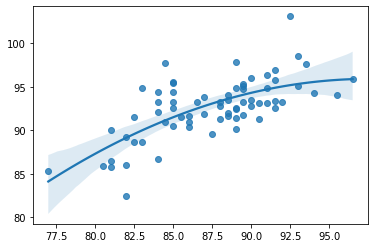

In [2873]:
sns.regplot(x=x_train, y=y_train, order=2)

## Additional Case

### Relation between a Possum's skull width and its' head length

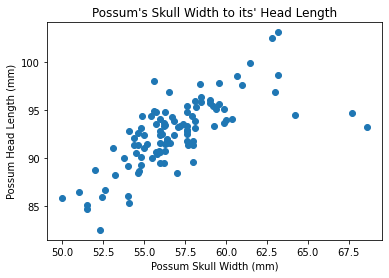

In [2874]:
plt.scatter(possum_data["skullw"], possum_data["hdlngth"])
plt.xlabel("Possum Skull Width (mm)")
plt.ylabel("Possum Head Length (mm)")
plt.title("Possum's Skull Width to its' Head Length")
plt.show()
 

### Separating Possum Study Case Data

In [2875]:
possum_case_2 = possum_data[["skullw", "hdlngth"]]
possum_case_2

,skullw,hdlngth
0,60.4,94.1
1,57.6,92.5
2,60.0,94.0
3,57.1,93.2
4,56.3,91.5
...,...,...
99,56.0,89.5
100,54.7,88.6
101,55.0,92.4
102,55.2,91.5


### Setting Selection Features

In [2876]:
X_2 = possum_case_2["skullw"].values
y_2 = possum_case_2["hdlngth"].values

### Reshaping Data

In [2877]:
X_2 = X_2.reshape(-1, 1)

### Splitting Data into train and test Data

In [2878]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, train_size=70, test_size=30, random_state=15)

### Fiting training data to the regression model

In [2879]:
lm_2 = LinearRegression()
lm_2.fit(x_2_train,y_2_train)
y_2_predict = lm_2.predict(x_2_test)

### Regression model score

In [2880]:
print(f"Train accuracy {round(lm_2.score(x_2_train,y_2_train)*100,2)} %")

Train accuracy 45.64 %


In [2881]:
print(f"Test accuracy {round(lm_2.score(x_2_test,y_2_test)*100,2)} %")

Test accuracy 53.77 %


### Relation between a Possum's skull width and its' head length Regression Model

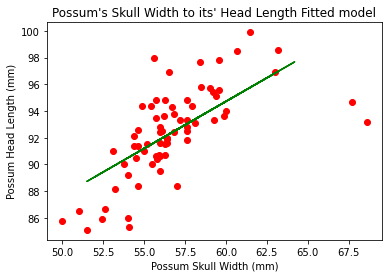

In [2882]:
plt.scatter(x_2_train,y_2_train,color='red')
plt.plot(x_2_test,y_2_predict, color='green')
plt.xlabel("Possum Skull Width (mm)")
plt.ylabel("Possum Head Length (mm)")
plt.title("Possum's Skull Width to its' Head Length Fitted model")
plt.show()

<AxesSubplot:>

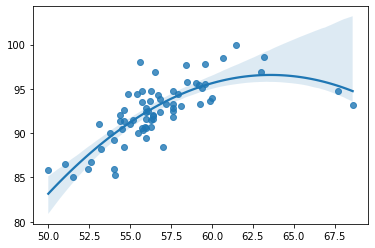

In [2883]:
sns.regplot(x=x_2_train, y=y_2_train, order=2)

## Conclusion

- Possum's head length is related to, and increases with the increasing of the Possum total length (head to tail).
- Possum's skull width is related to, and increases with the increasing of a Possum head length (but inconsistently).
- More Data is needed to cast more accurate assumptions and predictions.